# Windows and doors detection

In this file, we present the final methods applied for the creation of the model that presented the best results.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install ultralytics
import shutil
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 53.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Develompement environment

This project was made in the Google Colab environment. Below, there are presented the path to the dataset that was used in this research, the path where the models are eventually saved and a test image. When trying to run this notebook, adjust the below paths to the desired values.

In [14]:
# datasets
test_kw = '/content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/data/final_datasets/test_kw/data.yaml'

# models
models = '/content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/models'

# test images
wonen_test = '/content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/data/experiments/wonen_test.jpg'

# Stage 1

The model is trained into 2 stages. In the first stage, we load the weights of a pretrained yolov8 large model and we train it for 10 epochs.

In [6]:
model_stage_1 = YOLO("yolov8l.pt")

100%|██████████| 83.7M/83.7M [00:00<00:00, 366MB/s]


In [7]:
model_stage_1.train(
    data=test_kw,          # Path to your dataset configuration file

    # Hyperparameters
    epochs=10,                    # Number of epochs
    batch=32,                     # batch size
    imgsz=640,                    # Image size
    freeze=10,                     # Freeze first 10 layers
    patience=0,

    # Reproducability
    seed = 42
)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/data/final_datasets/test_kw/data.yaml, epochs=1, time=None, patience=0, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

100%|██████████| 755k/755k [00:00<00:00, 120MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 325MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1P_OZWr5NwXv8k0sOqz5HloKIERDD9Q-U/JADS Team 1/Data Intrapreneurship In Action/MVP/data/final_datasets/test_kw/train/labels.cache... 727 images, 0 backgrounds, 0 corrupt: 100%|██████████| 727/727 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1P_OZWr5NwXv8k0sOqz5HloKIERDD9Q-U/JADS Team 1/Data Intrapreneurship In Action/MVP/data/final_datasets/test_kw/valid/labels.cache... 100 images, 1 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      8.37G      1.353      2.216      1.369        388        640: 100%|██████████| 23/23 [00:23<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [02:31<00:00, 75.79s/it]


                   all        100        672     0.0232      0.683     0.0201    0.00952

1 epochs completed in 0.053 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


                   all        100        672     0.0232      0.683       0.02    0.00952
                  door         24         36     0.0109      0.694    0.00943    0.00317
                window         99        636     0.0355      0.671     0.0306     0.0159
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792b380d7f40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Model saving and evaluation

After the first stage, we save the last value of the weights and we run the evaluation using the test set. To be mentioned that the results of the validation are also available in the runs/detect folder.

In [8]:
import shutil

# Path to YOLOv8 trained model weights
trained_model_path = 'runs/detect/train/weights/last.pt' #update with the corresponding path

# Path to save in Google Drive with a custom name
custom_name = 'final_yolov8_freeze_10.pt'  # Replace with your desired name
destination_path = f'{models}/{custom_name}'

# Copy the best model to Google Drive
shutil.copy(trained_model_path, destination_path)

print(f'Model saved to {destination_path}')

Model saved to /content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/models/final_yolov8_freeze_10.pt


In [9]:
# load the last model of the previous stage to run the validation dataset
model_test = YOLO(f'{models}/{custom_name}')
model_test.val(data=test_kw, save=True)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1P_OZWr5NwXv8k0sOqz5HloKIERDD9Q-U/JADS Team 1/Data Intrapreneurship In Action/MVP/data/final_datasets/test_kw/valid/labels.cache... 100 images, 1 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:43<00:00,  6.18s/it]


                   all        100        672     0.0238      0.675     0.0232     0.0109
                  door         24         36     0.0102      0.667     0.0136    0.00502
                window         99        636     0.0373      0.682     0.0329     0.0167
Speed: 0.8ms preprocess, 12.7ms inference, 0.0ms loss, 13.9ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792ad8478f70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Stage 2

In the second stage, we load the last weights of obtained at the end of the stage 1, this time without freezing the backbone of the model, while doing this for 40 epochs, with a patience of 10.

In [10]:
# Initialise the new the last stage weight and train them for the stage 2
model_stage_2 = YOLO(f'{models}/{custom_name}')
model_stage_2.train(
    data=test_kw,

    # Hyperparameters
    epochs=40,                    # Number of epochs
    batch=32,                     # batch size
    imgsz=640,                    # Image size
    freeze=0,                     # Freeze first 10 layers
    patience=10,

    # Reproducability
    seed = 42
)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/models/final_yolov8_freeze_10.pt, data=/content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/data/final_datasets/test_kw/data.yaml, epochs=1, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=0, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

train: Scanning /content/drive/.shortcut-targets-by-id/1P_OZWr5NwXv8k0sOqz5HloKIERDD9Q-U/JADS Team 1/Data Intrapreneurship In Action/MVP/data/final_datasets/test_kw/train/labels.cache... 727 images, 0 backgrounds, 0 corrupt: 100%|██████████| 727/727 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/.shortcut-targets-by-id/1P_OZWr5NwXv8k0sOqz5HloKIERDD9Q-U/JADS Team 1/Data Intrapreneurship In Action/MVP/data/final_datasets/test_kw/valid/labels.cache... 100 images, 1 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      20.4G      1.046      1.045       1.17        388        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [01:10<00:00, 35.18s/it]


                   all        100        672      0.038      0.441     0.0303     0.0148

1 epochs completed in 0.030 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 87.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


                   all        100        672      0.038      0.441     0.0303     0.0148
                  door         24         36     0.0283      0.222     0.0193    0.00745
                window         99        636     0.0477       0.66     0.0413     0.0221
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792af06c3610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Model saving and evaluation

We do the same steps as after stage 1, where we save the model weights, this time, saving the weights that obtianed the best results. After this, we will make the validation, using the test dataset.

In [11]:
# Path to YOLOv8 trained model weights, selecting the best weights
trained_model_path = 'runs/detect/train/weights/best.pt' #update with the corresponding path

# Path to save in Google Drive with a custom name
custom_name_2 = 'final_yolov8_freeze_10_14_epochs.pt'  # Replace with your desired name
destination_path = f'{models}/{custom_name_2}'

# Copy the best model to Google Drive
shutil.copy(trained_model_path, destination_path)

print(f'Model saved to {destination_path}')

Model saved to /content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/models/final_yolov8_freeze_10_14_epochs.pt


In [12]:
# load the last model of the previous stage to run the validation dataset
model_test_2 = YOLO(f'{models}/{custom_name_2}')
model_test_2.val(data=test_kw, save=True)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1P_OZWr5NwXv8k0sOqz5HloKIERDD9Q-U/JADS Team 1/Data Intrapreneurship In Action/MVP/data/final_datasets/test_kw/valid/labels.cache... 100 images, 1 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:44<00:00,  6.37s/it]


                   all        100        672     0.0238      0.675     0.0232     0.0109
                  door         24         36     0.0102      0.667     0.0136    0.00502
                window         99        636     0.0373      0.682     0.0329     0.0167
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 9.6ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792b302ced70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Local testing

Choose a picture and run the model, in order to locally visualise the created bounding boxes of the best obtained model.


image 1/1 /content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/data/experiments/wonen_test.jpg: 448x640 22 doors, 278 windows, 59.2ms
Speed: 3.9ms preprocess, 59.2ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


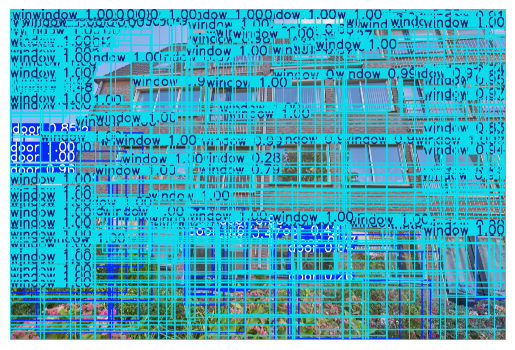

In [15]:
import cv2
import matplotlib.pyplot as plt


model = YOLO(f'{models}/{custom_name_2}')
results = model(wonen_test)

annotated_image = results[0].plot()

# Display the annotated image in the notebook
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Saving the logs

In the run/detect folder, there can be seen the different metrics of the model, such as losses and results, alongside the images resulted from different batches, confusion matrixes etc.

In [ ]:
# Define the source and destination directories
src = "runs/detect"
dst = "/content/drive/MyDrive/JADS Team 1/Data Intrapreneurship In Action/MVP/logs/final_test"

# Copy the directory recursively, allowing overwriting
shutil.copytree(src, dst, dirs_exist_ok=True)  # dirs_exist_ok=True allows copying even if dst exists
